In [1]:
# Installing the libraries
!pip install pandas -q
!pip install tabulate -q
!pip install seaborn -q
!pip install matplotlib -q
!pip install scikit-learn -q

# Data Load

In [2]:
import pandas as pd

# Loading the dataset
file_path = "../Dataset/final_depression_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


# Basic Data Exploration

In [1]:
from matplotlib import rcParams

dpi = 200
maxpix = 670
width = maxpix / dpi
rcParams.update({
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
    'legend.fontsize': 'x-small',
    'legend.frameon': False,
    'font.serif': ['Computer Modern', 'Helvetica', 'Arial', 'Tahoma', 'Lucida Grande', 'DejaVu Sans'],
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'figure.figsize': [0.4*width, 0.3*width],
    'figure.dpi': dpi,
    'text.color': "black",
    'axes.labelcolor': "black",
    'axes.facecolor': 'white',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'figure.facecolor': 'none',
    'lines.linewidth': .75,
    'xtick.top': True,
    'ytick.right': True,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
})

Number of surveys: 2556
Number of features/columns: 18
Number of Depressed people: 455
Number of Not Depressed people: 2101


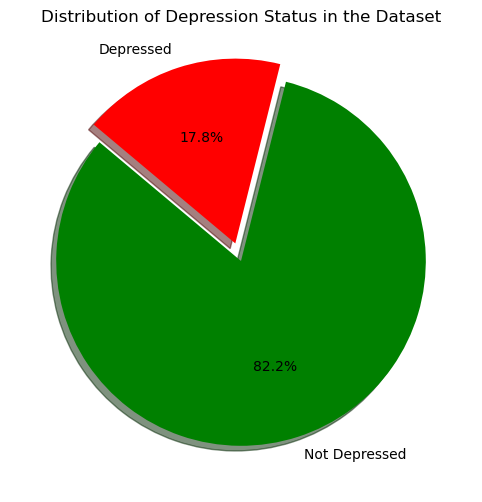

In [7]:
import matplotlib.pyplot as plt

def explore_dataset_with_plot(df):
    """
    Function to explore the dataset.
    Prints the number of surveys, number of features, and counts of depressed and non-depressed individuals.
    Additionally, plots a pie chart of the depression counts.
    """
    num_surveys = df.shape[0]
    num_features = df.shape[1]
    num_depressed = df[df['Depression'] == 'Yes'].shape[0]
    num_not_depressed = df[df['Depression'] == 'No'].shape[0]

    print(f"Number of surveys: {num_surveys}")
    print(f"Number of features/columns: {num_features}")
    print(f"Number of Depressed people: {num_depressed}")
    print(f"Number of Not Depressed people: {num_not_depressed}")

    # Pie chart
    labels = ['Not Depressed', 'Depressed']
    sizes = [num_not_depressed, num_depressed]
    colors = ['green', 'red']
    explode = (0, 0.1)

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Distribution of Depression Status in the Dataset')
    plt.show()

explore_dataset_with_plot(df)

In [15]:
column_name = "Gender"
df[column_name].value_counts()

Male      1333
Female    1223
Name: Gender, dtype: int64

In [19]:
df.groupby(column_name)['Depression'].value_counts()

Gender  Depression
Female  No            1009
        Yes            214
Male    No            1092
        Yes            241
Name: Depression, dtype: int64

In [21]:
52*0.05

2.6

In [29]:
def analyze_category_with_depression_improved(df, column_name, chart_title, fig_size, bar_figsize, pie_colors, bar_colors, ylim):

    # Univariate analysis: Value counts and percentages
    value_counts = df[column_name].value_counts()
    percentages = (value_counts / value_counts.sum()) * 100

    # Bivariate analysis: Depression status within each category
    depression_counts = df.groupby(column_name)['Depression'].value_counts().unstack(fill_value=0)
    depression_percentages = (depression_counts.T / depression_counts.sum(axis=1)).T * 100

    # Combine tables and adjust columns
    combined_df = pd.concat([value_counts, percentages.round(2), depression_counts, depression_percentages.round(2)], axis=1)
    combined_df.columns = ['Total Count', 'Total Percentage', 'No Depression Count', 'Yes Depression Count',
                           'No Depression Percentage', 'Yes Depression Percentage']
    combined_df.drop(columns=['No Depression Percentage'], inplace=True)  # Dropping No Depression Percentage column

    # Print table in markdown format with better column names
    print(combined_df.to_markdown())

    # Explode smaller slices more for visibility
    explode_values = (0.05 * (percentages / percentages.max())).round(2).values

    # Plotting the pie chart for category distribution
    plt.figure(figsize=(fig_size[0], fig_size[1]))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=pie_colors, startangle=140, shadow=True, explode=explode_values)
    plt.title(f'{chart_title} Distribution')

    # Plotting the bar chart for percentage of depressed in each category
    plt.figure(figsize=(bar_figsize[0], bar_figsize[1]))
    depression_percentages['Yes'].plot(kind='bar', color=bar_colors, ylim=ylim)
    plt.xlabel(column_name)
    plt.ylabel('Percentage Depressed')
    plt.title(f'Depression Rate by {chart_title}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

|        |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|:-------|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
| Male   |          1333 |              52.15 |                  1092 |                    241 |                       18.08 |
| Female |          1223 |              47.85 |                  1009 |                    214 |                       17.5  |


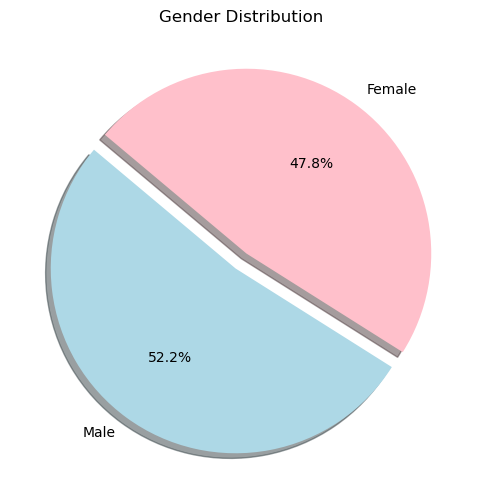

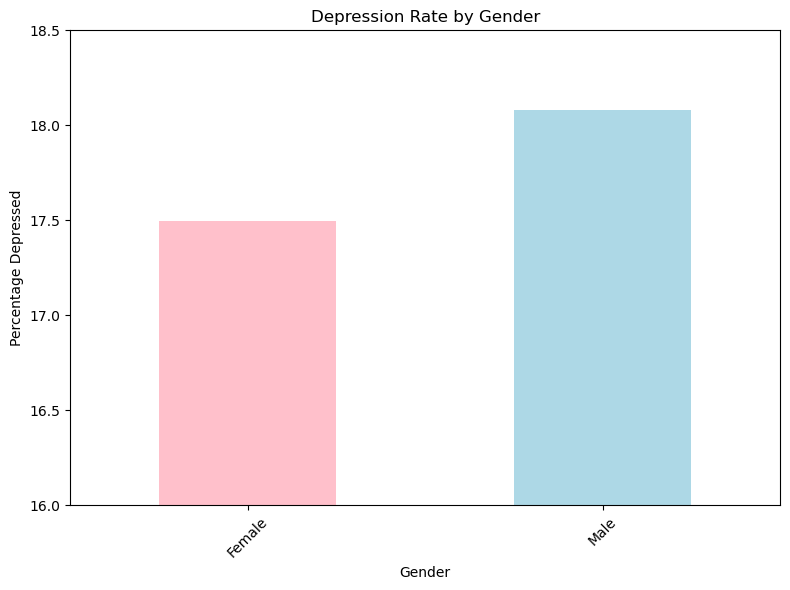

In [31]:
analyze_category_with_depression_improved(
    df, 
    'Gender', 
    'Gender', 
    (6, 6), 
    (8, 6), 
    ['lightblue', 'pink'], 
    ['pink', 'lightblue'], 
    (16, 18.5)
)

|                      |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|:---------------------|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
| Working Professional |          2054 |              80.36 |                  1851 |                    203 |                        9.88 |
| Student              |           502 |              19.64 |                   250 |                    252 |                       50.2  |


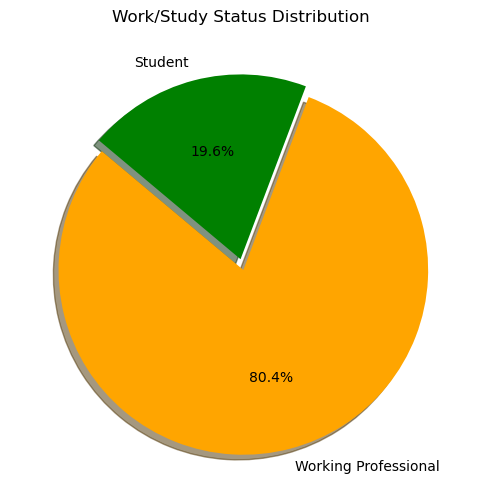

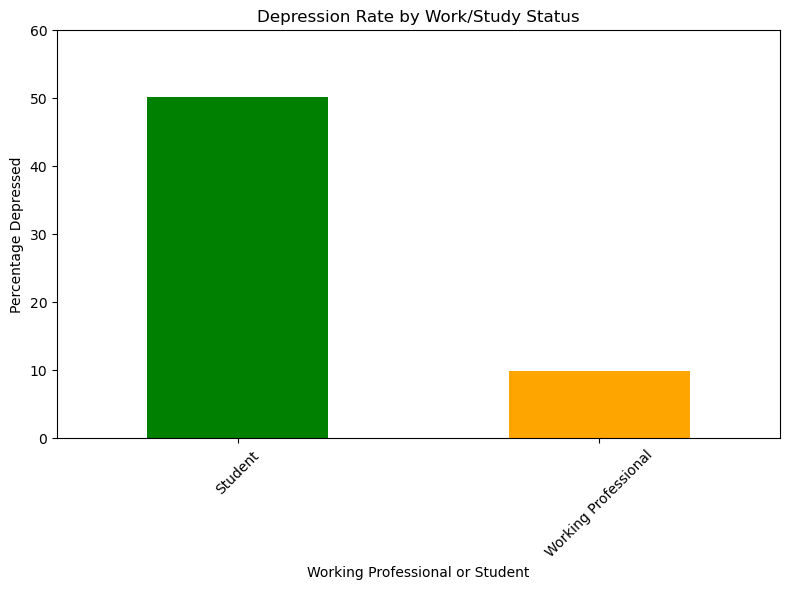

In [9]:
analyze_category_with_depression_improved(
    df, 
    'Working Professional or Student', 
    'Work/Study Status', 
    (6, 6), 
    (8, 6), 
    ['orange', 'green'], 
    ['green', 'orange'], 
    (0, 60)
)


|     |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|:----|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
| No  |          1307 |              51.13 |                  1212 |                     95 |                        7.27 |
| Yes |          1249 |              48.87 |                   889 |                    360 |                       28.82 |


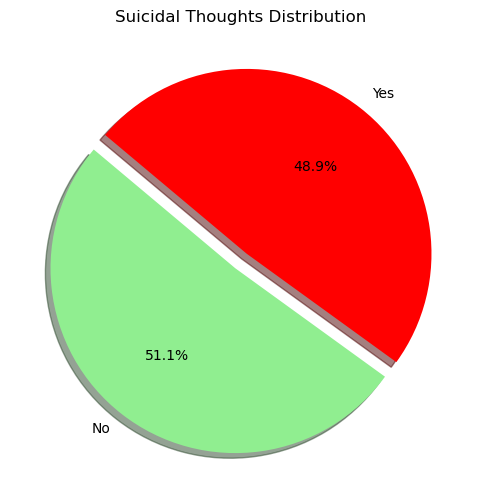

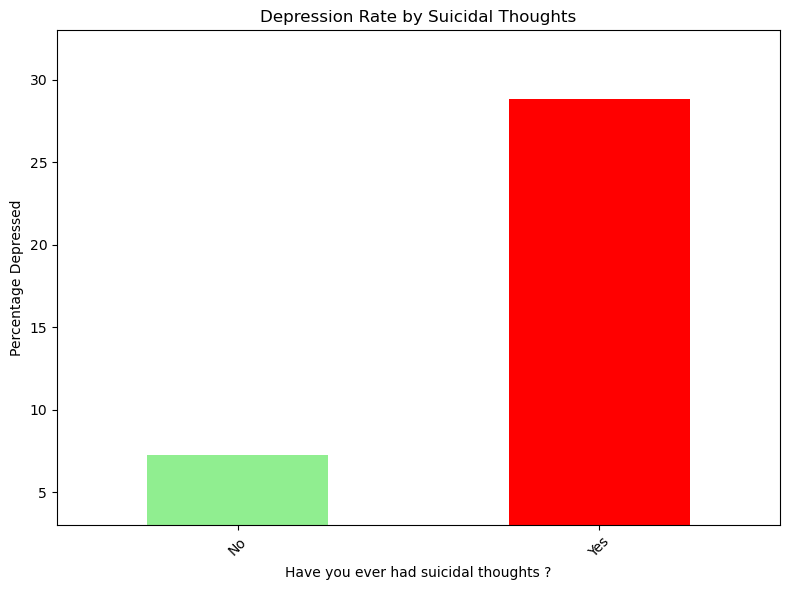

In [10]:
analyze_category_with_depression_improved(
    df, 
    'Have you ever had suicidal thoughts ?', 
    'Suicidal Thoughts', 
    (6, 6), 
    (8, 6), 
    ['lightgreen', 'red'], 
    ['lightgreen', 'red'], 
    (3, 33)
)

|     |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|:----|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
| No  |          1311 |              51.29 |                  1087 |                    224 |                       17.09 |
| Yes |          1245 |              48.71 |                  1014 |                    231 |                       18.55 |


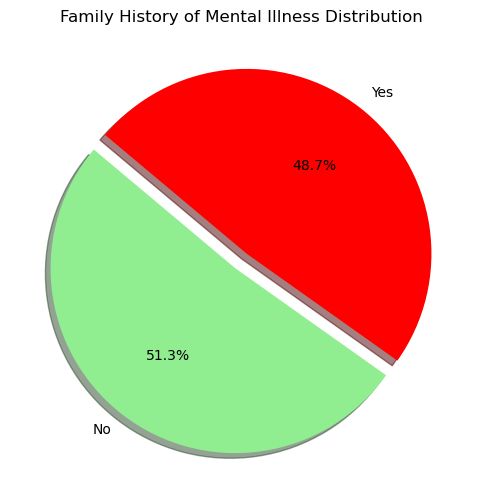

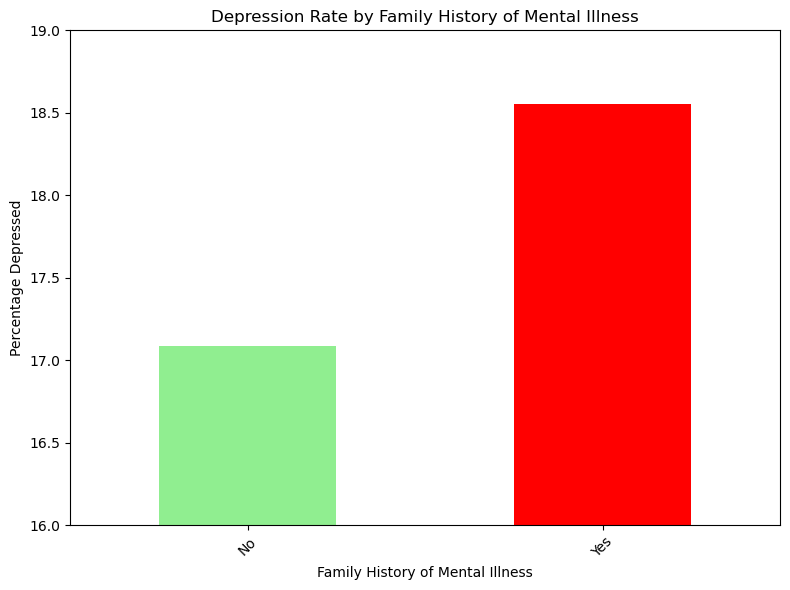

In [11]:
analyze_category_with_depression_improved(
    df, 
    'Family History of Mental Illness', 
    'Family History of Mental Illness', 
    (6, 6), 
    (8, 6), 
    ['lightgreen', 'red'], 
    ['lightgreen', 'red'], 
    (16, 19)
)


|    |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|---:|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
|  3 |           125 |              24.9  |                    62 |                     63 |                       50.4  |
|  1 |            99 |              19.72 |                    82 |                     17 |                       17.17 |
|  5 |            98 |              19.52 |                    15 |                     83 |                       84.69 |
|  4 |            92 |              18.33 |                    30 |                     62 |                       67.39 |
|  2 |            88 |              17.53 |                    61 |                     27 |                       30.68 |


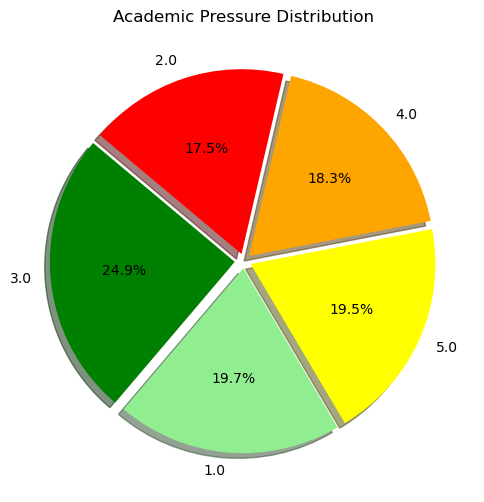

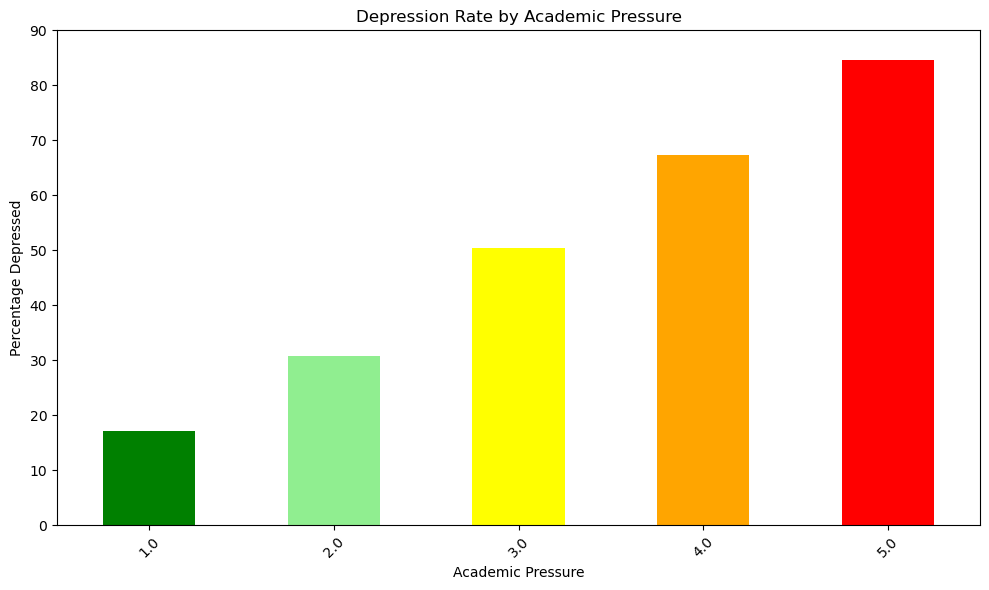

In [12]:
analyze_category_with_depression_improved(
    df,
    'Academic Pressure',
    'Academic Pressure',
    (6, 6),
    (10, 6),
    ['green', 'lightgreen', 'yellow', 'orange', 'red'],
    ['green', 'lightgreen', 'yellow', 'orange', 'red'],
    (0, 90)
)

|    |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|---:|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
|  5 |           424 |              20.64 |                   340 |                     84 |                       19.81 |
|  2 |           413 |              20.11 |                   393 |                     20 |                        4.84 |
|  4 |           412 |              20.06 |                   358 |                     54 |                       13.11 |
|  3 |           404 |              19.67 |                   372 |                     32 |                        7.92 |
|  1 |           401 |              19.52 |                   388 |                     13 |                        3.24 |


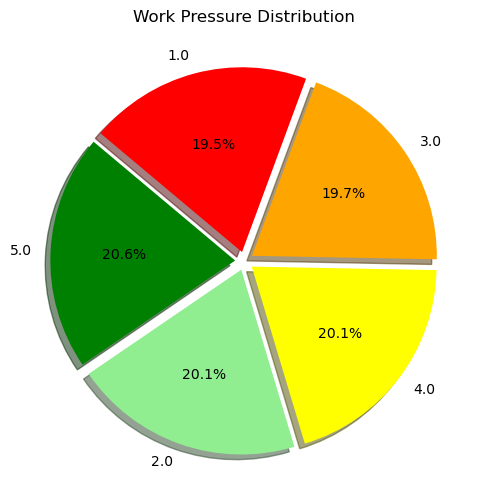

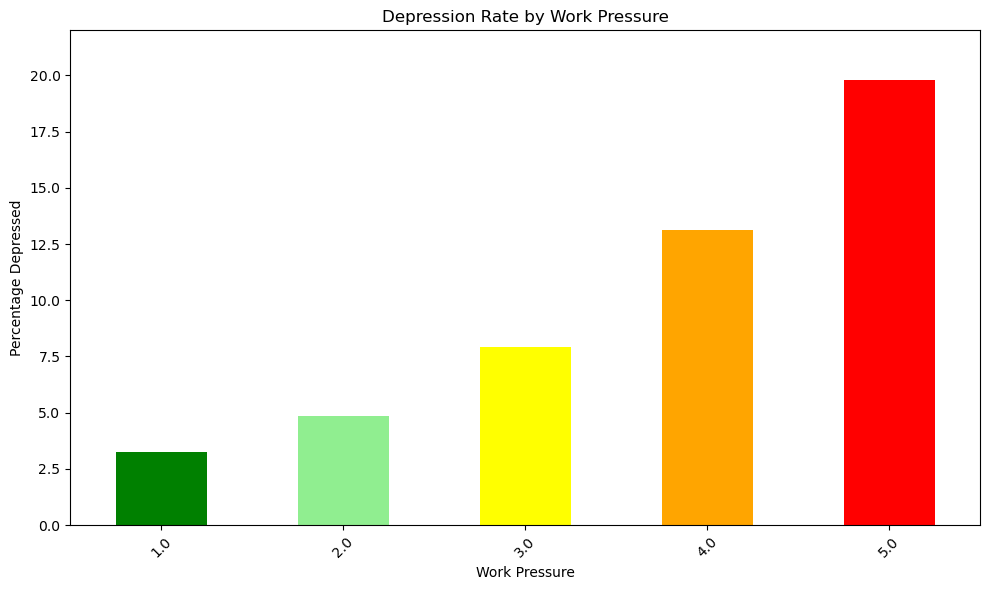

In [13]:
analyze_category_with_depression_improved(
    df,
    'Work Pressure',
    'Work Pressure',
    (6, 6),
    (10, 6),
    ['green', 'lightgreen', 'yellow', 'orange', 'red'],
    ['green', 'lightgreen', 'yellow', 'orange', 'red'],
    (0, 22)
)


|    |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|---:|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
|  4 |           116 |              23.11 |                    70 |                     46 |                       39.66 |
|  3 |           103 |              20.52 |                    52 |                     51 |                       49.51 |
|  2 |           100 |              19.92 |                    38 |                     62 |                       62    |
|  5 |            97 |              19.32 |                    67 |                     30 |                       30.93 |
|  1 |            86 |              17.13 |                    23 |                     63 |                       73.26 |


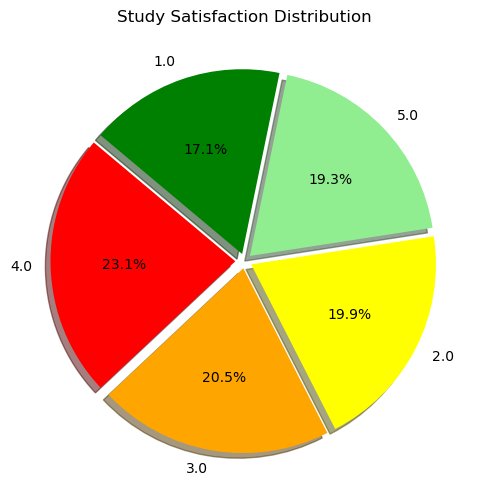

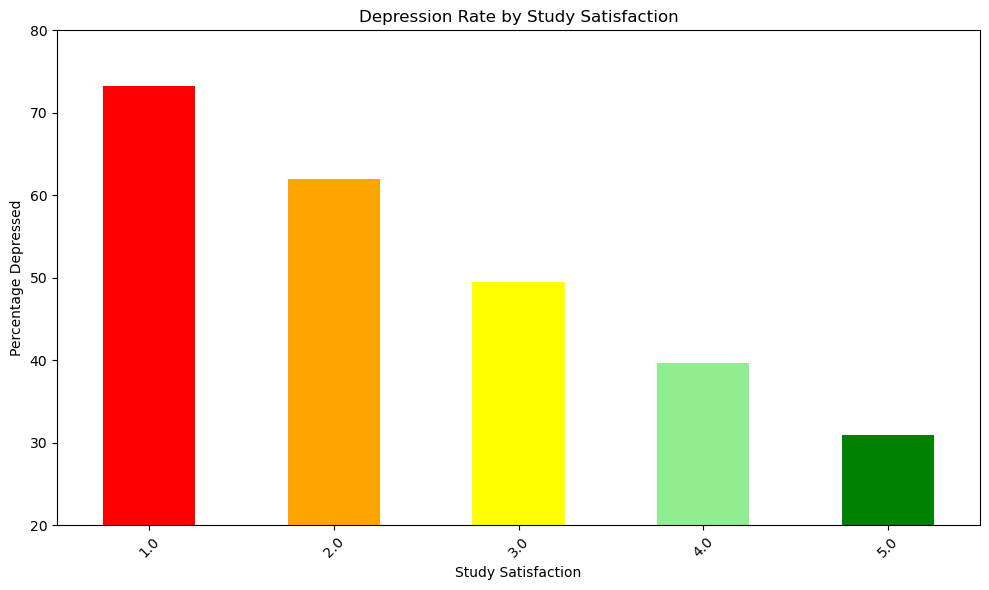

In [14]:
analyze_category_with_depression_improved(
    df,
    'Study Satisfaction',
    'Study Satisfaction',
    (6, 6),
    (10, 6),
    ['red', 'orange', 'yellow', 'lightgreen', 'green'],
    ['red', 'orange', 'yellow', 'lightgreen', 'green'],
    (20, 80)
)


|    |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|---:|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
|  5 |           431 |              20.98 |                   408 |                     23 |                        5.34 |
|  2 |           431 |              20.98 |                   375 |                     56 |                       12.99 |
|  3 |           404 |              19.67 |                   373 |                     31 |                        7.67 |
|  1 |           396 |              19.28 |                   321 |                     75 |                       18.94 |
|  4 |           392 |              19.08 |                   374 |                     18 |                        4.59 |


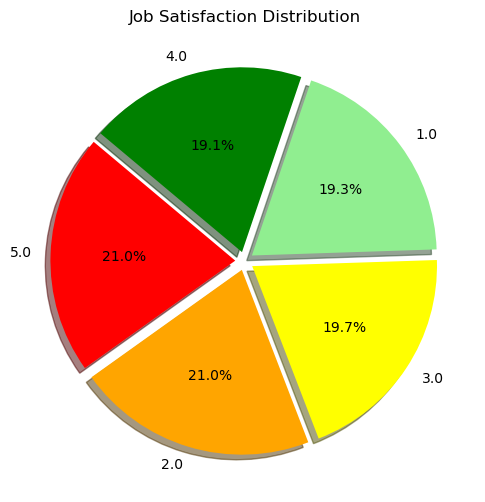

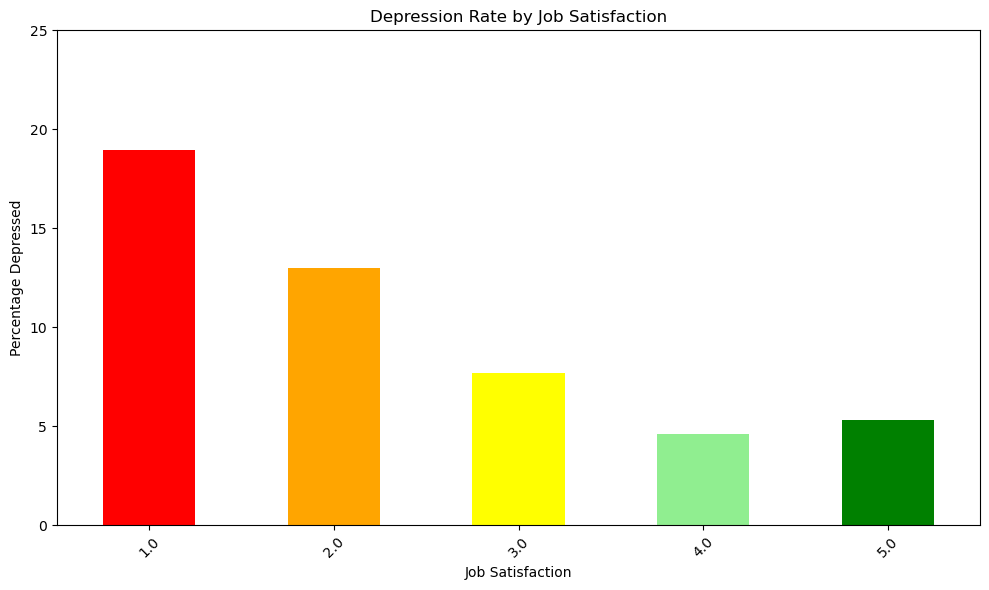

In [15]:
analyze_category_with_depression_improved(
    df,
    'Job Satisfaction',
    'Job Satisfaction',
    (6, 6),
    (10, 6),
    ['red', 'orange', 'yellow', 'lightgreen', 'green'],
    ['red', 'orange', 'yellow', 'lightgreen', 'green'],
    (0, 25)
)


|           |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|:----------|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
| Unhealthy |           882 |              34.51 |                   678 |                    204 |                       23.13 |
| Healthy   |           842 |              32.94 |                   732 |                    110 |                       13.06 |
| Moderate  |           832 |              32.55 |                   691 |                    141 |                       16.95 |


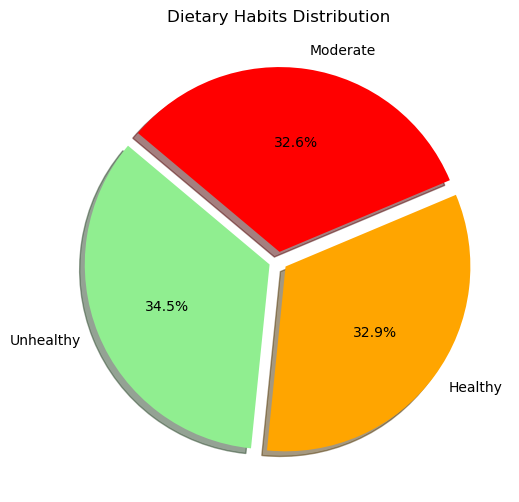

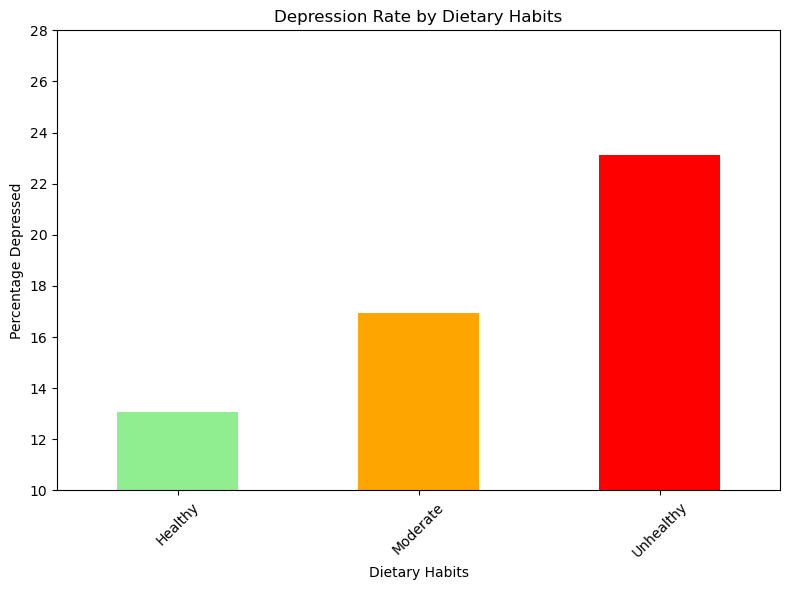

In [16]:
analyze_category_with_depression_improved(
    df,
    'Dietary Habits',
    'Dietary Habits',
    (6, 6),
    (8, 6),
    ['lightgreen', 'orange', 'red'],
    ['lightgreen', 'orange', 'red'],
    (10, 28) 
)


|    |   Total Count |   Total Percentage |   No Depression Count |   Yes Depression Count |   Yes Depression Percentage |
|---:|--------------:|-------------------:|----------------------:|-----------------------:|----------------------------:|
|  2 |           549 |              21.48 |                   482 |                     67 |                       12.2  |
|  1 |           517 |              20.23 |                   463 |                     54 |                       10.44 |
|  4 |           501 |              19.6  |                   397 |                    104 |                       20.76 |
|  5 |           501 |              19.6  |                   358 |                    143 |                       28.54 |
|  3 |           488 |              19.09 |                   401 |                     87 |                       17.83 |


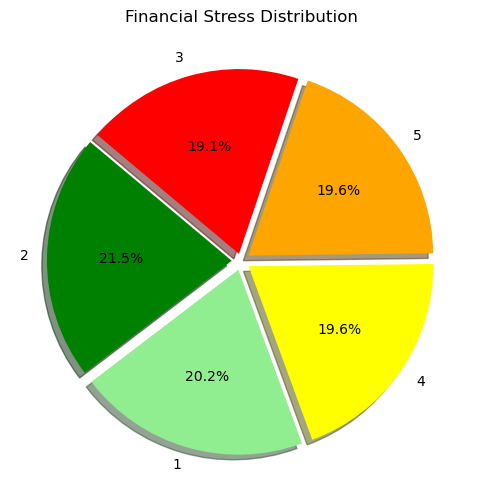

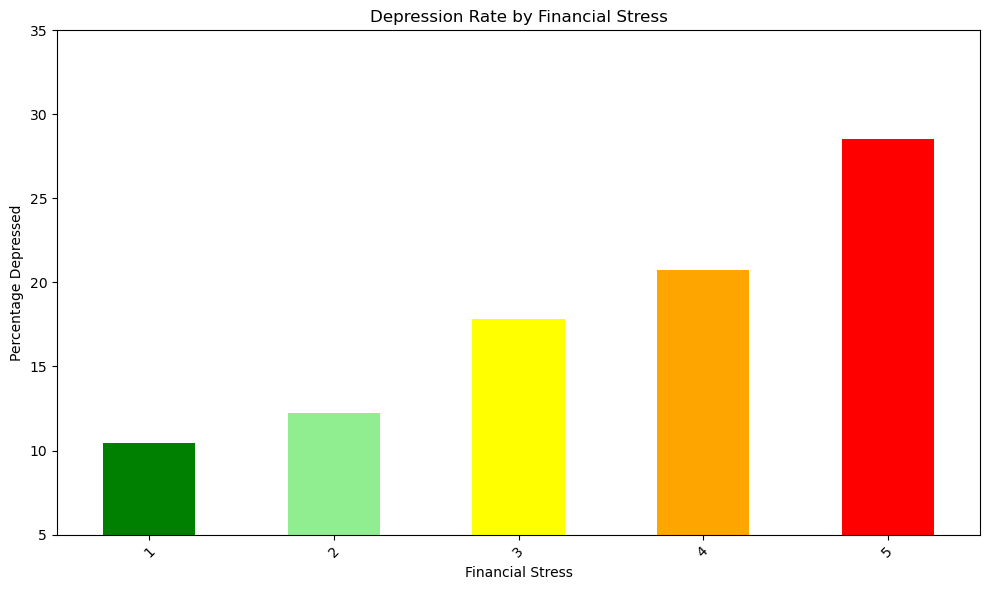

In [17]:
analyze_category_with_depression_improved(
    df,
    'Financial Stress',
    'Financial Stress',
    (6, 6),
    (10, 6),
    ['green', 'lightgreen', 'yellow', 'orange', 'red'],
    ['green', 'lightgreen', 'yellow', 'orange', 'red'],
    (5, 35)
)


City
Varanasi         12.048193
Delhi            12.162162
Jaipur           12.500000
Kanpur           13.095238
Bangalore        13.157895
Faridabad        13.698630
Meerut           13.861386
Agra             14.117647
Mumbai           16.161616
Kalyan           16.304348
Nagpur           16.666667
Visakhapatnam    16.666667
Ludhiana         17.045455
Chennai          17.045455
Vadodara         17.045455
Indore           17.073171
Pune             17.346939
Ghaziabad        17.647059
Rajkot           17.708333
Nashik           17.808219
Patna            17.977528
Kolkata          19.540230
Surat            20.000000
Ahmedabad        20.652174
Thane            21.250000
Vasai-Virar      22.105263
Bhopal           22.222222
Lucknow          22.666667
Srinagar         23.529412
Hyderabad        32.941176
Name: Depression, dtype: float64


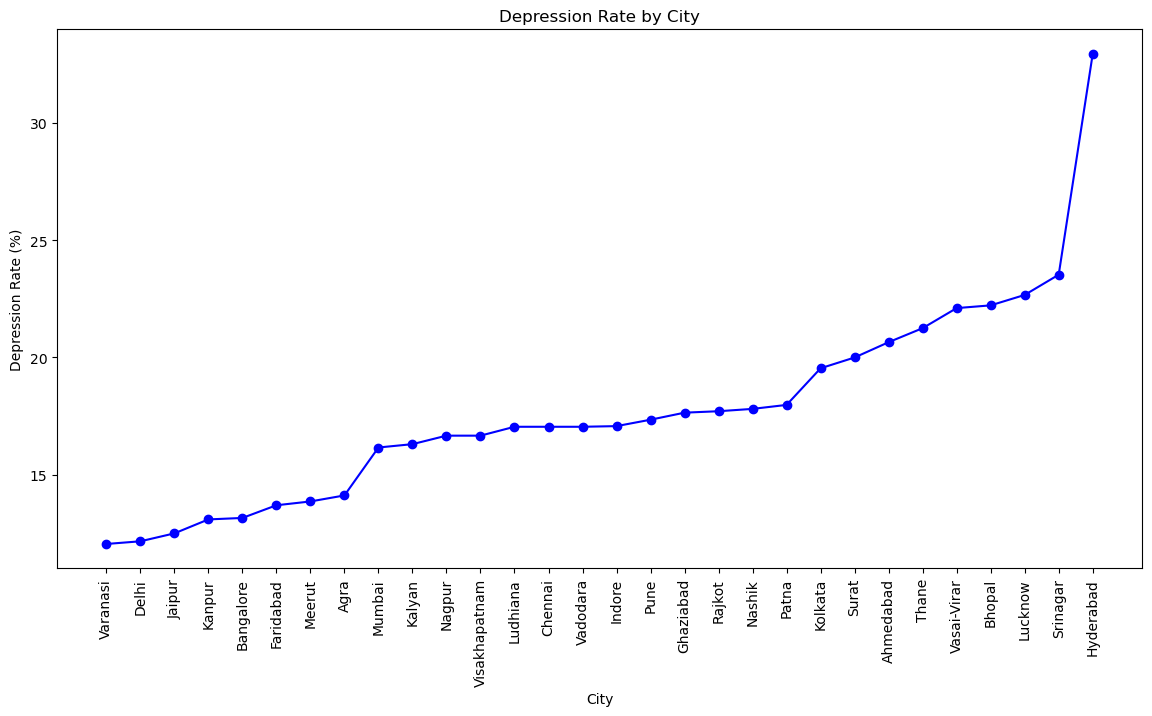

In [19]:
# Calculate the depression rate by City
city_depression_rate = df.groupby('City')['Depression'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values()

# Print the depression rate by City
print(city_depression_rate)

# Plotting the depression rate by City in ascending order
plt.figure(figsize=(14, 7))
plt.plot(city_depression_rate.index, city_depression_rate.values, marker='o', linestyle='-', color='blue')
plt.title('Depression Rate by City')
plt.xlabel('City')
plt.ylabel('Depression Rate (%)')
plt.xticks(rotation=90)  # Rotate city names for better readability
plt.show()


Profession
Pharmacist                 1.333333
Entrepreneur               1.587302
Chemist                    1.694915
Travel Consultant          2.173913
Software Engineer          2.941176
Digital Marketer           3.225806
Content Writer             3.448276
Researcher                 4.444444
Customer Support           4.878049
Finanancial Analyst        5.263158
Electrician                6.060606
Doctor                     6.060606
Sales Executive            6.250000
Consultant                 6.944444
Manager                    7.142857
Marketing Manager          7.692308
UX/UI Designer             7.692308
Pilot                      7.692308
Business Analyst           8.450704
Chef                       8.474576
Plumber                    8.571429
Teacher                    8.695652
Educational Consultant     9.090909
Investment Banker          9.090909
Civil Engineer             9.677419
Lawyer                    10.416667
Financial Analyst         11.111111
Accountant       

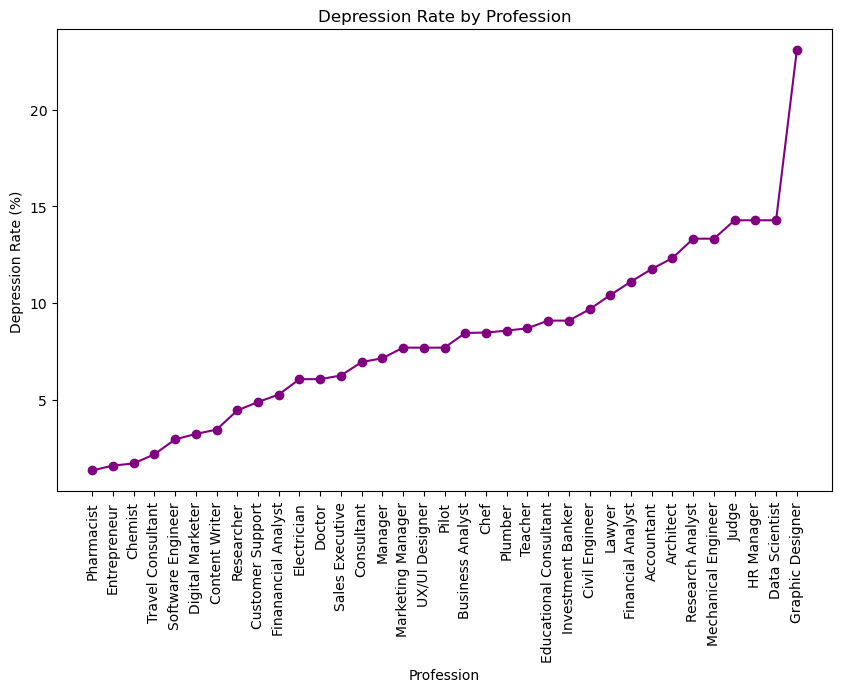

In [20]:
# Calculate the depression rate by Profession
profession_depression_rate = df.groupby('Profession')['Depression'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values()

# Print the depression rate by Profession
print(profession_depression_rate)

# Plotting the depression rate by Profession in ascending order
plt.figure(figsize=(10, 6))
plt.plot(profession_depression_rate.index, profession_depression_rate.values, marker='o', linestyle='-', color='purple')
plt.title('Depression Rate by Profession')
plt.xlabel('Profession')
plt.ylabel('Depression Rate (%)')
plt.xticks(rotation=90)
plt.show()


Degree
MHM          7.407407
MD           9.459459
ME           9.523810
M.Pharm     10.588235
LLM         10.714286
M.Tech      11.764706
BHM         12.222222
PhD         12.345679
BA          12.359551
MBA         13.684211
BSc         13.829787
M.Com       13.846154
BBA         14.130435
B.Ed        14.285714
B.Arch      14.606742
MSc         14.736842
MCA         15.740741
B.Pharm     15.909091
M.Ed        16.049383
MA          16.455696
B.Com       16.521739
MBBS        17.333333
BCA         18.446602
BE          20.238095
LLB         20.731707
B.Tech      21.126761
Class 12    45.818182
Name: Depression, dtype: float64


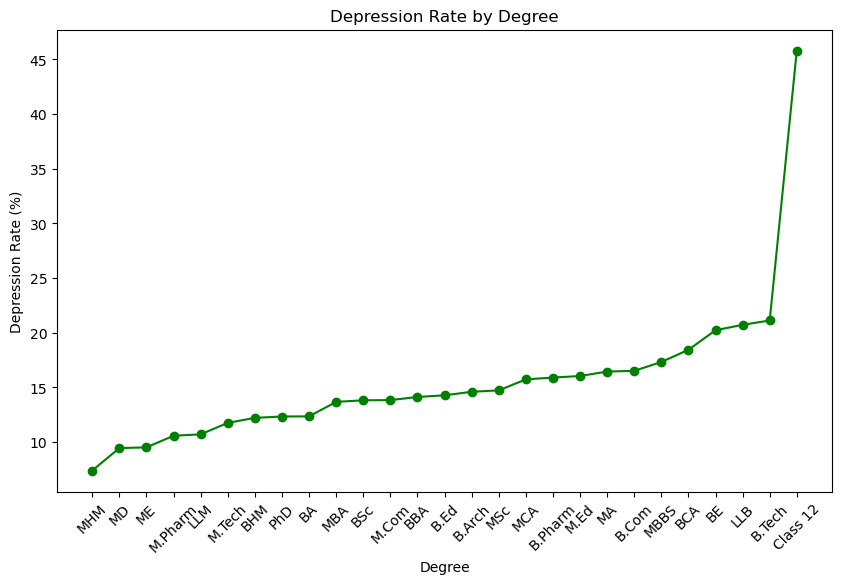

In [21]:
# Calculate the depression rate by Degree
degree_depression_rate = df.groupby('Degree')['Depression'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values()

# Print the depression rate by Degree
print(degree_depression_rate)

# Plotting the depression rate by Degree in ascending order
plt.figure(figsize=(10, 6))
plt.plot(degree_depression_rate.index, degree_depression_rate.values, marker='o', linestyle='-', color='green')
plt.title('Depression Rate by Degree')
plt.xlabel('Degree')
plt.ylabel('Depression Rate (%)')
plt.xticks(rotation=45)
plt.show()
